# Quasi-Normal Mode Frequencies 

This code aims to calculate the QNM frequencies of Kerr Black Holes. The method and equations used come from Leaver 1985 and Nollert 1992

To Do:
- Revisit root finding with more educated guesses

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpmath import findroot 
import random
import cmath 

s = -2 # Field Spin-Weight for gravitaional fields 
l = 2
m = 0
a = 0 # Angular momentum per unit mass, 0 <= a <= 1/2
Alm = l*(l+1) - s*(s+1) # Value of Alm for a = 0 (Schwarzchild)
b = (1 - 4*a**2)**0.5 # Auxiliary rotation parameter 

j = complex(0,1) # sqrt(-1)
N = 100 # Recursion depth of continued fraction 
no_inversions = 1

# Find more solutions to 13
# Plug them into 14 

_NamespacePath(['/Users/oluwoledelano/Documents/00_Physics/KCL Lionel London/positive', '/Users/oluwoledelano/Documents/00_Physics/KCL Lionel London/positive', '/Users/oluwoledelano/Documents/00_Physics/KCL Lionel London/positive'])


In [3]:
# Leaver 20
k_1 = 0.5 * abs(m-s) 
k_2 = 0.5 * abs(m+s) 

def alpha_theta_n(n):
    return -2*(n+1)*(n + 2*k_1 + 1)
def beta_theta_n(n,w):
    return n*(n-1) * 2*n*(k_1 + k_2 + 1 - 2*a*w) - [2*a*w*(2*k_1 + s + 1) \
             - (k_1 + k_2)*(k_1 + k_2 + 1) - a**2 * w**2 + s*(s+1) + Alm]
def gamma_theta_n(n,w):
    return 2*a*w*(n + k_1 +k_2 + s)

# Leaver 25
def alpha_r_n(w,n):
    return n**2 +(c_0(w) + 1)*n + c_0(w) 
def beta_r_n(w,n):
    return -2*n**2 + (c_1(w) + 2)*n + c_3(w) 
def gamma_r_n(w,n):
    return n**2 + (c_2(w) - 3)*n + c_4(w) - c_2(w) + 2 

# Leaver 26
def c_0(w):
    return 1 - s - w*j - (2*j/b) * (w/2 - a*m) 
def c_1(w):
    return -4 + 2*j*w*(2 + b) + (4*j/b) * (w/2 - a*m)
def c_2(w):
    return s + 3 - 3*j*w - (2*j/b)*(w/2 - a*m)
def c_3(w):
    return w**2 * (4 + 2*b - a**2) - 2*a*m*w - s - 1 + (2+b)*j*w - Alm + ((4*w + 2*j)/b)*(w/2 - a*m)
def c_4(w):
    return s + 1 -2*w**2 - (2*s+3)*j*w - ((4*w + 2*j)/b)*(w/2 - a*m)

In [4]:
# Leaver (13)
def continued_fraction(w,n):
    """ 
    Continued fraction in Leaver (13)
    """
    if (n == N):
        return nollert_14(w)
    return alpha_r_n(w,n) * ( gamma_r_n(w,n+1) / ( beta_r_n(w,n+1) - continued_fraction(w,n+1) ) )

def w_equation(w,n_=0):
    """ 
    Leaver (13)
    n starts from 0 and goes up to N
    """
    return beta_r_n(w,0) - continued_fraction(w,n_) 

# Leaver (14)
def continued_fraction_l14(w,n):
    """
    Continued fraction on LHS of equation 14 in leavers paper
    """
    if (n==1):
        return ( alpha_r_n(w,0) * gamma_r_n(w,1) ) / beta_r_n(w,0)
    return alpha_r_n(w,n-1) * ( gamma_r_n(w,n) / ( beta_r_n(w,n-1) - continued_fraction_l14(w,n-1) ) )

def lhs_leaver_14(w,n):
    """ 
    LHS of Leaver (14)
    """
    return beta_r_n(w,n) - continued_fraction_l14(w,n)

def continued_fraction_r14(w,n):
    """
    RHS of Leaver (14)
    """
    if (n == N):
        return 1
    return alpha_r_n(w,n) * ( gamma_r_n(w,n+1) / ( beta_r_n(w,n+1) - continued_fraction(w,n+1) ) )

def leaver_14(w,n=no_inversions):
    return lhs_leaver_14(w,n) - continued_fraction_r14(w,n)

C_0 = -1

def C_1(w):
    if ( (cmath.sqrt(2 * j * w)).real ) != -1 * ( (cmath.sqrt(2 * j * w)).real ):
        return cmath.sqrt(2 * j * w)
    else:
        return -1 * cmath.sqrt(2 * j * w)
    
def C_2(w):
    return -2 * j * w + 3/4

def C_3(w):
    return 1/C_1(w) * ( 1/(2*l*(l + 1) -2*w**2 -3/2*j*w +3/32) )

def nollert_14(w,n=N):
    return C_0 + ( C_1(w) * n ** -0.5 ) + ( C_2(w) * n ** -1 ) + ( C_3(w) * n ** -1.5 )

def guess_root(w_n,w_n1):
    return (w_n1 - w_n) / 2

def root_searching(func,array,expected_no_roots):

    lim = 5
    
    while (len(array) < expected_no_roots):
        if (len(array) <= 2 or array[-1].real == -1 * array[-2].real): 
            x_rand = random.uniform(-lim,lim)
            y_rand = random.uniform(-lim,lim)
            w_initial_guess = x_rand + 1j*y_rand
            w_roots = findroot(func, w_initial_guess, solver='muller')
            test_w_roots = complex(round(w_roots.real,10),round(w_roots.imag,10))
        else: 
            w_guess = guess_root(array[-2],array[-1])
            w_roots = findroot(func, w_guess, solver='muller')
            test_w_roots = complex(round(w_roots.real,10),round(w_roots.imag,10))
        
        if all(x != test_w_roots for x in array):
            array.append(test_w_roots) 
            print(func(w_roots))
            print("Root number ", len(array), ": ", w_roots)

    return array

In [5]:
# Root finding for w - Leaver (13)
print("**************************************")
x13_lower_lim = -5
x13_upper_lim = 5
y13_lower_lim = -5
y13_upper_lim = 5

root_count = 0 
roots = []
while (root_count < 6):
    x_rand = random.uniform(x13_lower_lim,x13_upper_lim)
    y_rand = random.uniform(y13_lower_lim,y13_upper_lim)
    w_initial_guess = x_rand + 1j*y_rand

    w_roots = findroot(w_equation, w_initial_guess, solver='muller')
    test_w_roots = complex(round(w_roots.real,10),round(w_roots.imag,10))
    
    if all(x != test_w_roots for x in roots):
        print(w_equation(w_roots))
        print("Root number ", root_count, " of the Leaver (13): ", w_roots)

        root_count += 1
        roots.append(test_w_roots) 
print("**************************************")

# Root finding for w - Leaver (14)
roots_14 = []
r14_count = 0
guesses = [complex(-0.5,-0.75), complex(-0.6,-0.6), complex(-1,-0.5), complex(-0.5,-0.5) /
           complex(0.5,-0.75), complex(0.6,-0.6), complex(1,-0.5), complex(0.5,-0.5)]
w_initial_guess_14 = 0.5 - 1j*-1
for i in guesses:
    w_roots_14 = findroot(leaver_14, i, solver='muller')
    test_w14_roots = complex(round(w_roots_14.real,10),round(w_roots_14.imag,10))
    if all(x != test_w14_roots for x in roots_14):
        print(w_equation(w_roots_14))
        print("Root number ", r14_count, " of Leaver (14) are: ", w_roots_14)
        roots_14.append(test_w14_roots)
        r14_count += 1 
print("**************************************")

**************************************
(-7.7715611723761e-16 - 4.44089209850063e-16j)
Root number  0  of the Leaver (13):  (0.693421993841969 - 0.547829750572975j)
(-1.11022302462516e-15 - 5.55111512312578e-16j)
Root number  1  of the Leaver (13):  (0.747343368836097 - 0.177924631377883j)
(-1.11022302462516e-15 + 5.55111512312578e-16j)
Root number  2  of the Leaver (13):  (-0.747343368836097 - 0.177924631377883j)
(-7.7715611723761e-16 + 4.44089209850063e-16j)
Root number  3  of the Leaver (13):  (-0.693421993841969 - 0.547829750572975j)
(-5.77315972805081e-15 + 3.46389583683049e-14j)
Root number  4  of the Leaver (13):  (-0.602106903146173 - 0.956553894737409j)
(-5.77315972805081e-15 - 3.46389583683049e-14j)
Root number  5  of the Leaver (13):  (0.602106903146173 - 0.956553894737409j)
**************************************
(-5.77315972805081e-15 + 3.46389583683049e-14j)
Root number  0  of Leaver (14) are:  (-0.602106903146173 - 0.956553894737409j)
(-5.77315972805081e-15 - 3.46389583683

In [6]:
#rootfinding_13 = []
#rootfinding_13 = root_searching(w_equation,rootfinding_13,6)

#rootfinding_14 = []
#rootfinding_14 = root_searching(leaver_14,rootfinding_14,4)

/var/folders/y3/hp40kpgs7h90qkr394qyxk_40000gn/T/ipykernel_19130/1298062796.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(contour_plot)


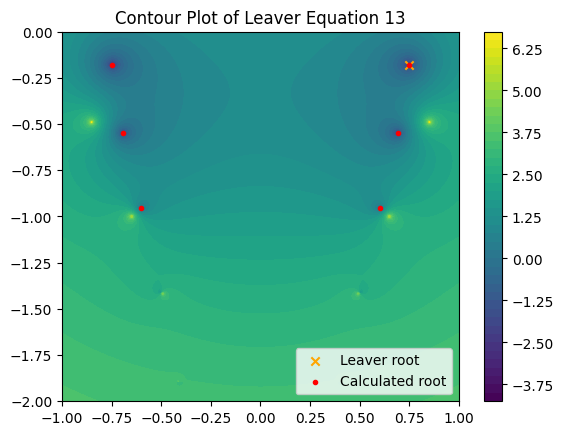

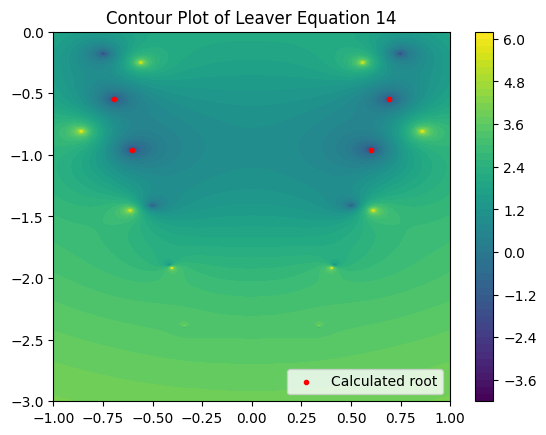

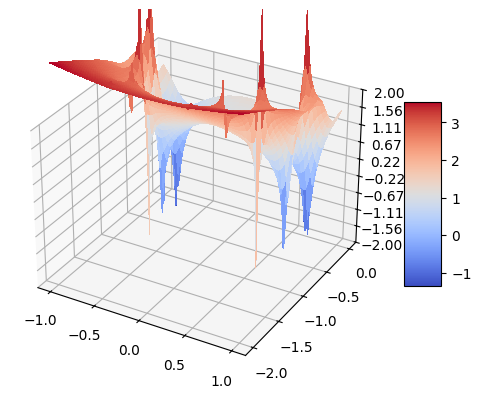

In [7]:
I = 500

x, y = np.meshgrid(np.linspace(-1,1,I),np.linspace(-2,0,I))
w = x + 1j*y
v_w_equation = np.vectorize(w_equation)
values = v_w_equation(w)

x2, y2 = np.meshgrid(np.linspace(-1,1,I),np.linspace(-3,0,I))
w2= x2 + 1j*y2
v_leaver_14 = np.vectorize(leaver_14)
values_14 = v_leaver_14(w2)

# Contour plot of log(abs(values))
fig, ax = plt.subplots()
ax.title.set_text("Contour Plot of Leaver Equation 13")
contour_plot = ax.contourf(x,y,np.log(abs(values)),50)
fig.colorbar(contour_plot)

# Contour plot of log(abs(values_14))
fig2, ax2 = plt.subplots()
ax2.title.set_text("Contour Plot of Leaver Equation 14")
contour_plot = ax2.contourf(x2,y2,np.log(abs(values_14)),50)
fig.colorbar(contour_plot)

# 3D Plot of log(abs(values))
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax3.plot_surface(w.real, w.imag, np.log(abs(values)), cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False) 
ax3.set_zlim(-2, 2) # Customize the z axis.
ax3.zaxis.set_major_locator(LinearLocator(10))
ax3.zaxis.set_major_formatter('{x:.02f}')
fig3.colorbar(surf, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.

# Reference point from leaver 
w_reference = 0.7473433688360835-0.17792463137787093*j
ax.scatter(w_reference.real,w_reference.imag,color='orange',marker='x',label='Leaver root')

# Plot of roots calculated 
for i in range(len(roots) - 1):
    ax.scatter(roots[i].real,roots[i].imag,color='red',marker='.') 
ax.scatter(roots[len(roots)-1].real,roots[len(roots)-1].imag,color='red',marker='.',label='Calculated root') 

for i in range(len(roots_14) - 1):
    ax2.scatter(roots_14[i].real,roots_14[i].imag,color='red',marker='.') 
ax2.scatter(roots_14[len(roots_14)-1].real,roots_14[len(roots_14)-1].imag,color='red',marker='.',label='Calculated root') 

ax.legend(loc='lower right')
ax2.legend(loc='lower right')